<a href="https://colab.research.google.com/github/mikekvashchuk888/Mykhailo-Kvashchuk-s-Projects/blob/main/structure_property_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Small, educational dataset (not for high-precision prediction)
# Values are approximate and used to demonstrate trends.
data = [
    {"name":"methane", "mw":16.04, "alcohol":0, "amine":0, "carboxylic_acid":0, "carbonyl":0, "halogen":0, "aromatic":0, "bp_C":-161.5},
    {"name":"ethane", "mw":30.07, "alcohol":0, "amine":0, "carboxylic_acid":0, "carbonyl":0, "halogen":0, "aromatic":0, "bp_C":-88.6},
    {"name":"propane", "mw":44.10, "alcohol":0, "amine":0, "carboxylic_acid":0, "carbonyl":0, "halogen":0, "aromatic":0, "bp_C":-42.1},
    {"name":"butane", "mw":58.12, "alcohol":0, "amine":0, "carboxylic_acid":0, "carbonyl":0, "halogen":0, "aromatic":0, "bp_C":-0.5},

    {"name":"ethanol", "mw":46.07, "alcohol":1, "amine":0, "carboxylic_acid":0, "carbonyl":0, "halogen":0, "aromatic":0, "bp_C":78.4},
    {"name":"1-propanol", "mw":60.10, "alcohol":1, "amine":0, "carboxylic_acid":0, "carbonyl":0, "halogen":0, "aromatic":0, "bp_C":97.2},
    {"name":"acetone", "mw":58.08, "alcohol":0, "amine":0, "carboxylic_acid":0, "carbonyl":1, "halogen":0, "aromatic":0, "bp_C":56.0},
    {"name":"acetic acid", "mw":60.05, "alcohol":0, "amine":0, "carboxylic_acid":1, "carbonyl":1, "halogen":0, "aromatic":0, "bp_C":118.1},

    {"name":"aniline", "mw":93.13, "alcohol":0, "amine":1, "carboxylic_acid":0, "carbonyl":0, "halogen":0, "aromatic":1, "bp_C":184.1},
    {"name":"toluene", "mw":92.14, "alcohol":0, "amine":0, "carboxylic_acid":0, "carbonyl":0, "halogen":0, "aromatic":1, "bp_C":110.6},
    {"name":"chloroform", "mw":119.38, "alcohol":0, "amine":0, "carboxylic_acid":0, "carbonyl":0, "halogen":1, "aromatic":0, "bp_C":61.2},
]

df = pd.DataFrame(data)
df


,name,mw,alcohol,amine,carboxylic_acid,carbonyl,halogen,aromatic,bp_C
0,methane,16.04,0,0,0,0,0,0,-161.5
1,ethane,30.07,0,0,0,0,0,0,-88.6
2,propane,44.10,0,0,0,0,0,0,-42.1
3,butane,58.12,0,0,0,0,0,0,-0.5
4,ethanol,46.07,1,0,0,0,0,0,78.4
5,1-propanol,60.10,1,0,0,0,0,0,97.2
6,acetone,58.08,0,0,0,1,0,0,56.0
7,acetic acid,60.05,0,0,1,1,0,0,118.1
8,aniline,93.13,0,1,0,0,0,1,184.1
9,toluene,92.14,0,0,0,0,0,1,110.6


In [2]:
def predict_properties(row):
    """
    Trend-based predictor.
    Outputs:
      - bp_trend_score (higher means higher expected boiling point)
      - solubility_class (low/medium/high) as a trend
      - explanation string
    """
    score = 0
    reasons = []

    # Molecular weight tends to increase bp (dispersion forces)
    score += 0.02 * row["mw"]
    reasons.append(f"MW contributes +{0.02*row['mw']:.2f} (stronger dispersion forces with size)")

    # Functional groups that enable strong intermolecular forces raise bp
    if row["carboxylic_acid"] == 1:
        score += 3.0
        reasons.append("+3.0 carboxylic acid (very strong H-bonding / dimerization)")
    if row["alcohol"] == 1:
        score += 2.0
        reasons.append("+2.0 alcohol (H-bonding)")
    if row["amine"] == 1:
        score += 1.5
        reasons.append("+1.5 amine (H-bonding / polarity)")
    if row["carbonyl"] == 1 and row["carboxylic_acid"] == 0:
        score += 1.0
        reasons.append("+1.0 carbonyl (dipole-dipole interactions)")
    if row["aromatic"] == 1:
        score += 0.8
        reasons.append("+0.8 aromatic ring (polarizability / pi interactions)")
    if row["halogen"] == 1:
        score += 0.6
        reasons.append("+0.6 halogen (higher polarizability)")

    # Solubility trend (very simplified):
    # H-bonding + polarity increases water solubility; high MW decreases it.
    sol_score = 0
    sol_score += 2*row["alcohol"] + 2*row["amine"] + 3*row["carboxylic_acid"] + 1*row["carbonyl"]
    sol_score -= 0.01 * row["mw"]

    if sol_score >= 2.0:
        sol_class = "high"
    elif sol_score >= 0.8:
        sol_class = "medium"
    else:
        sol_class = "low"

    explanation = " | ".join(reasons)

    return pd.Series({
        "bp_trend_score": score,
        "water_solubility_trend": sol_class,
        "explanation": explanation
    })

df_pred = df.copy()
df_pred[["bp_trend_score","water_solubility_trend","explanation"]] = df_pred.apply(predict_properties, axis=1)
df_pred[["name","mw","bp_C","bp_trend_score","water_solubility_trend"]]


,name,mw,bp_C,bp_trend_score,water_solubility_trend
0,methane,16.04,-161.5,0.3208,low
1,ethane,30.07,-88.6,0.6014,low
2,propane,44.10,-42.1,0.8820,low
3,butane,58.12,-0.5,1.1624,low
4,ethanol,46.07,78.4,2.9214,medium
5,1-propanol,60.10,97.2,3.2020,medium
6,acetone,58.08,56.0,2.1616,low
7,acetic acid,60.05,118.1,4.2010,high
8,aniline,93.13,184.1,4.1626,medium
9,toluene,92.14,110.6,2.6428,low


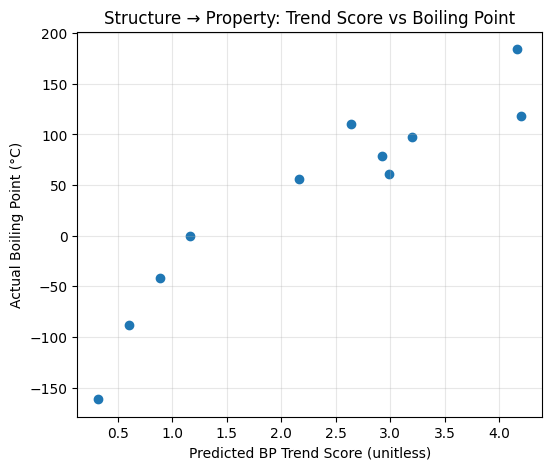

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.scatter(df_pred["bp_trend_score"], df_pred["bp_C"])
plt.xlabel("Predicted BP Trend Score (unitless)")
plt.ylabel("Actual Boiling Point (°C)")
plt.title("Structure → Property: Trend Score vs Boiling Point")
plt.grid(True, alpha=0.3)
plt.show()


In [4]:
def predict_custom_molecule(
    name,
    mw,
    alcohol=0,
    amine=0,
    carboxylic_acid=0,
    carbonyl=0,
    halogen=0,
    aromatic=0
):
    row = {
        "name": name,
        "mw": mw,
        "alcohol": alcohol,
        "amine": amine,
        "carboxylic_acid": carboxylic_acid,
        "carbonyl": carbonyl,
        "halogen": halogen,
        "aromatic": aromatic
    }
    row = pd.Series(row)
    prediction = predict_properties(row)

    print(f"\nPredicted trends for {name}:")
    print("Boiling point trend score:", round(prediction["bp_trend_score"], 2))
    print("Water solubility trend:", prediction["water_solubility_trend"])
    print("\nExplanation:")
    print(prediction["explanation"])

    return prediction


In [5]:
predict_custom_molecule(
    name="phenol",
    mw=94.11,
    alcohol=1,
    aromatic=1
)



Predicted trends for phenol:
Boiling point trend score: 4.68
Water solubility trend: medium

Explanation:
MW contributes +1.88 (stronger dispersion forces with size) | +2.0 alcohol (H-bonding) | +0.8 aromatic ring (polarizability / pi interactions)


,0
bp_trend_score,4.6822
water_solubility_trend,medium
explanation,MW contributes +1.88 (stronger dispersion forc...
